In [6]:
import bootstrap
import matplotlib.pyplot as plt
import time
import datetime
import numpy as np

In [ ]:
"""
class IsingGap(SDP):
    def __init__(self, dim, cutoff, kmax, lmax, nmax, mmax):
        self.dim=dim
        self.cutoff=cutoff
        self.kmax=kmax
        self.lmax=lmax
        self.nmax=nmax
        self.mmax=mmax
"""

In [ ]:
class IsingGap(object):
    def __init__(self):
        self.inputs={}        

In [7]:
#Initialize empty inputs dictionary. Don't put bootstrap.cutoff in here for now.
#inputs={}
inputs['dim']=3
inputs['kmax']=7
inputs['lmax']=7
inputs['nmax']=4
inputs['mmax']=2
print(inputs)

{'dim': 3, 'kmax': 7, 'lmax': 7, 'nmax': 4, 'mmax': 2}


In [8]:
#Iterate_parameter must take an input parameter and alter the default input dictionary.
#par is a string, the parameter name. input_parameters is the input dictionary. par_range is a numpy array.
#Take 'dim' out of inputs??
def iterate_parameter(par, par_range, input_ps):
    if type(par_range)==int:
        par_range=[par_range]
#    input_parameters[par]=x
    start_time=time.time()
    start_cpu=time.clock()
    sig_set=np.arange(0.5,0.85,0.05)
    eps_set=np.arange(1.0,2.2,0.2)
    bootstrap.cutoff=1e-10
#    dim=3
#    k_max=7
#    l_max=7
#    n_max=4
#    m_max=2
    for x in par_range:
        input_ps[par]=x
        tab1=bootstrap.ConformalBlockTable(input_ps['dim'],input_ps['kmax'],input_ps['lmax'],input_ps['mmax'],input_ps['nmax'])
#        tab1=bootstrap.ConformalBlockTable(dim,k_max,l_max,m_max,n_max)
        tab2=bootstrap.ConvolvedBlockTable(tab1)
        #Do we need dim,tab2,sig_set,eps_set as inputs here? Aren't they local variables?
        plot_grid(x,input_ps['dim'],tab2,sig_set,eps_set)
    end_time=time.time()
    end_cpu=time.clock()
    run_time=time.strftime("%H:%M:%S",time.gmtime(end_time-start_time))
    cpu_time=time.strftime("%H:%M:%S",time.gmtime(end_cpu-start_cpu))
    print("Run time "+run_time, "CPU time "+cpu_time)

In [9]:
def plot_grid(parameter,dimension,table,sig_range,eps_range):
    start_time=time.time()
    start_cpu=time.clock()
    allowed_sig=[]
    allowed_eps=[]
    disallowed_sig=[]
    disallowed_eps=[]
    for sig in sig_range:
        for eps in eps_range:
            sdp=bootstrap.SDP(sig,table)
            sdp.set_bound(0,float(dimension))
            sdp.add_point(0,eps)
            result=sdp.iterate()
            if result:
                allowed_sig.append(sig)
                allowed_eps.append(eps)
            else:
                disallowed_sig.append(sig)
                disallowed_eps.append(eps)
    end_time=time.time()
    end_cpu=time.clock()
    run_time=time.strftime("%H:%M:%S",time.gmtime(end_time-start_time))
    cpu_time=time.strftime("%H:%M:%S",time.gmtime(end_cpu-start_cpu))
    plt.plot(allowed_sig,allowed_eps,'r+')
    plt.plot(disallowed_sig,disallowed_eps,'b+')
    plt.title("n_max="+str(parameter)+". Time Taken: "+run_time+". CPU Time: "+cpu_time)
    plt.show()

Testing out the code by recreating the n=1,2,3 results in n_exploration.ipynb:

/Users/MatthewDowens/Dropbox/PhD/bootstrap/pycftboot/bootstrap.py:952: RuntimeWarning: invalid value encountered in subtract
  product *= x - (p - shift)
/Users/MatthewDowens/Dropbox/PhD/bootstrap/pycftboot/bootstrap.py:953: RuntimeWarning: invalid value encountered in add
  return (base ** (x + shift)) / product


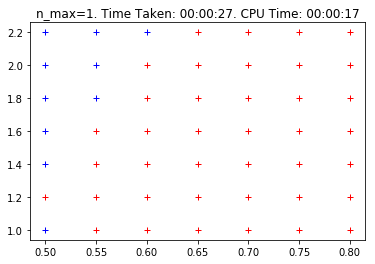

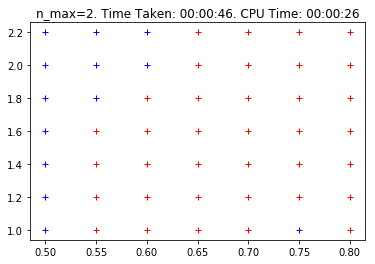

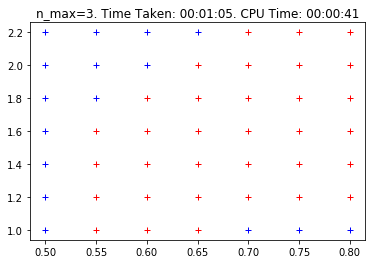

Run time 00:02:22 CPU time 00:01:28


In [11]:
n_range=np.arange(1,4,1)
iterate_parameter('nmax',n_range,inputs)